# The mountain Car problem

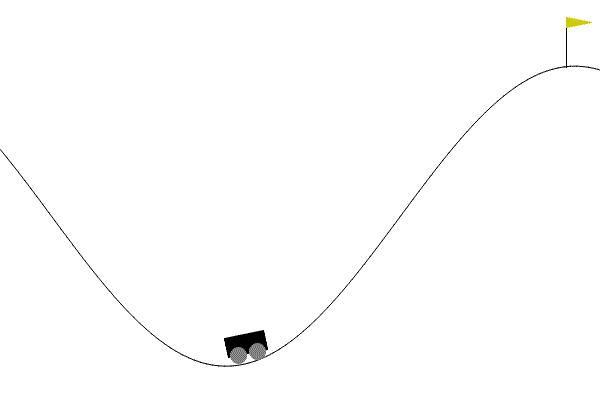

In [1]:
! pip install gym[classic_control]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 42.3 MB/s eta 0:00:00


In [2]:
import gym
import random
from IPython.display import clear_output

env = gym.make("MountainCar-v0")
env.reset()

array([-0.5489241,  0.       ], dtype=float32)

In [3]:
#Object's type in the action space
print("The Action Space is an object of type: {0}\n".format(env.action_space))
#Shape of the Action Space
print("The Shape of the Action Space is: {0}\n".format(env.action_space.n))
#Object's type in the Observation Space
print("The Environment Space is an object of type: {0}\n".format(env.observation_space))
#Shape of the Observation space
print("The Shape of the dimention Space are: {0}\n".format(env.observation_space.shape))
#The High and Low values in the observation space
print("The High values in the observation space are {0}, The Low values are {1}\n".format(
env.observation_space.high,env.observation_space.low))
#Minimum and Maximum car position 
print("The Minimum and Maximum Car's Position are: {0}, {1}\n".format(
env.observation_space.low[0],env.observation_space.high[0]))
#Minimum and Maximum Car Velocity
print("The Minimum and Maximum Car's Velocity are: {0}, {1}\n".format(
env.observation_space.low[1],env.observation_space.high[1]))
#Example of observation
print("The Observations at a given timestep are {0}\n".format(env.observation_space.sample()))

The Action Space is an object of type: Discrete(3)

The Shape of the Action Space is: 3

The Environment Space is an object of type: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

The Shape of the dimention Space are: (2,)

The High values in the observation space are [0.6  0.07], The Low values are [-1.2  -0.07]

The Minimum and Maximum Car's Position are: -1.2000000476837158, 0.6000000238418579

The Minimum and Maximum Car's Velocity are: -0.07000000029802322, 0.07000000029802322

The Observations at a given timestep are [-0.13054222 -0.04448488]



In [4]:
print(env.reset())

[-0.5576574  0.       ]


* To take an action (for example, a = 2), it is necessary to “step forward” the environment by that action using the step() method. This returns a 4-ple giving the new state, reward, a Boolean indicating whether or not the episode has terminated (due to the goal being reached or 200 steps having elapsed), and any additional information (this is always empty for this problem).

In [5]:
print(env.step(2))

(array([-0.5564024,  0.001255 ], dtype=float32), -1.0, False, {})


In [6]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
env.reset()

# Define Q-learning function
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
    
        while done != True:   
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
    
    
    return ave_reward_list


In [7]:
import os
try:
    os.environ['DISPLAY']
except:
    os.environ['SDL_VIDEODRIVER']='dummy'

## <b><span style='color:purple'>Run Q-learning algorithm for 1000 episodes</span></b> 

Text(0.5, 1.0, 'Average Reward vs Episodes')

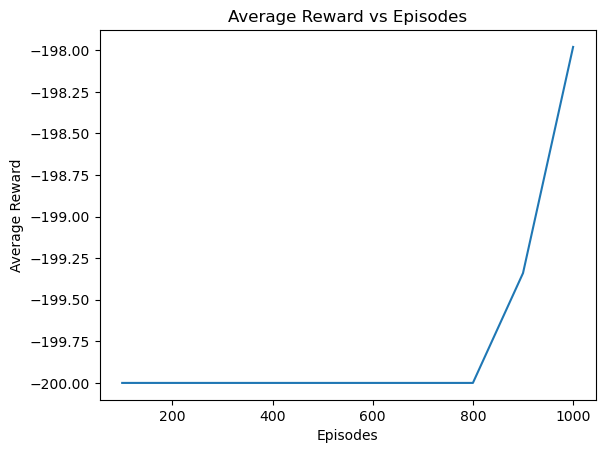

In [8]:
# QLearning(env, learning, discount, epsilon, min_eps, episodes)
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 1000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

* ### **In the final 1000 episodes, the algorithm takes what it’s learned through exploration and exploits it in order to increase the average reward**

## <b><span style='color:purple'>Run Q-learning algorithm for 5000 episodes</span></b> 

Text(0.5, 1.0, 'Average Reward vs Episodes')

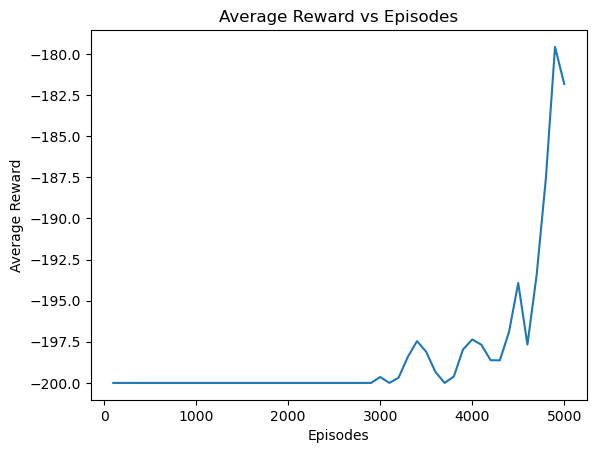

In [9]:
# QLearning(env, learning, discount, epsilon, min_eps, episodes)
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

## <b><span style='color:purple'> Run Q-learning algorithm for 5000 episodes and epsilon = 0.5</span></b> 

Text(0.5, 1.0, 'Average Reward vs Episodes')

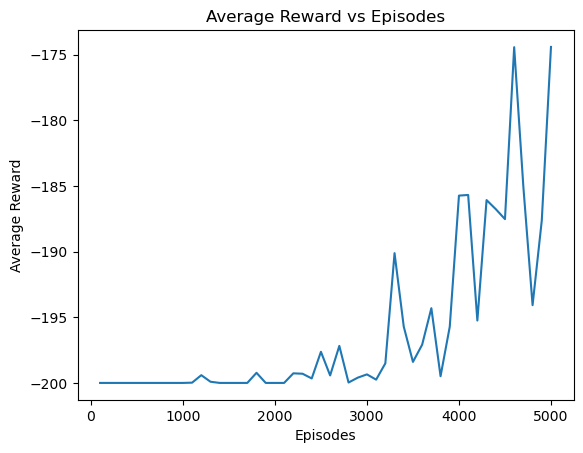

In [10]:
# QLearning(env, learning, discount, epsilon, min_eps, episodes)
rewards = QLearning(env, 0.2, 0.9, 0.5, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

## <b><span style='color:purple'> Run Q-learning algorithm for 5000 discount = 0.5</span></b> 

Text(0.5, 1.0, 'Average Reward vs Episodes')

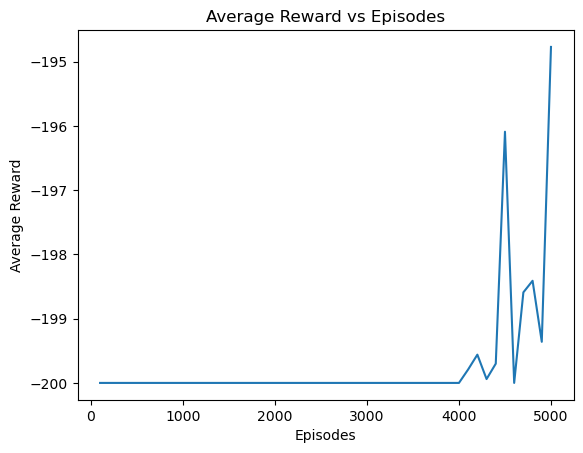

In [11]:
# QLearning(env, learning, discount, epsilon, min_eps, episodes)
rewards = QLearning(env, 0.2, 0.5, 0.8, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

## <b><span style='color:purple'> Run Q-learning algorithm for 5000 episodes epsilon = 0.1</span></b> 

Text(0.5, 1.0, 'Average Reward vs Episodes')

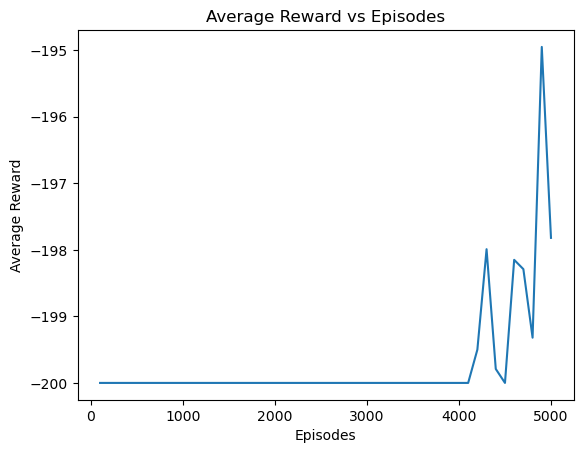

In [12]:
# QLearning(env, learning, discount, epsilon, min_eps, episodes)
rewards = QLearning(env, 0.2, 0.1, 0.8, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

<div style="border-radius:10px; border:maroon; padding: 15px; font-size:100%; text-align:left">

--- 
* ###  **Notice:**
If we increase the number of episodes by an order of magnitude to 5000, however, by the end of the 5000 episodes the car is able to ascend the mountain perfectly, almost every time.

---

<div style="border-radius:10px; border:maroon; padding: 15px; font-size:100%; text-align:left">

---
# **Summary:**
we have demonstrated how RL can be used to solve the OpenAI Gym Mountain Car problem. To solve this problem, it was necessary to discretize our state space and make some small modifications to the Q-learning algorithm.
    
---